## Step:5 Try with RandomForestClassifier Model 

In [22]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


df = pd.read_csv("./data/cardio_cleaned.csv")

## 1. Split features & target

In [23]:
X = df.iloc[:,1:8]
y = df.iloc[:,-3:-2]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.3)

In [24]:
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # kept for consistency
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

kNeighbors = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

models = {
    'Logistic Regression': log_reg_pipeline,
    'Random Forest': rf_pipeline,
    'kNeighbors': kNeighbors
}
print(df.shape)

(67563, 14)



Training Logistic Regression...
Logistic Regression Accuracy: 0.7211


C:\Users\yashp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


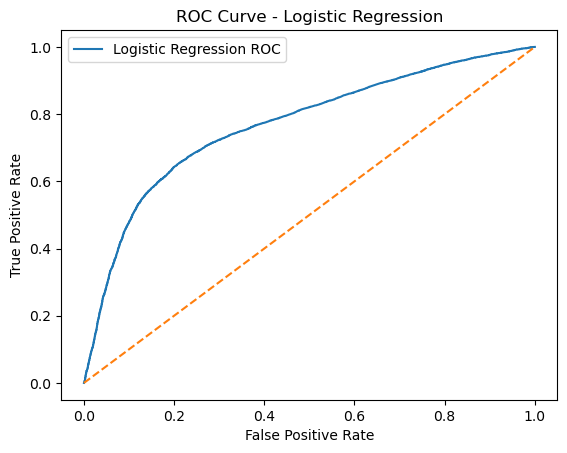


Training Random Forest...


C:\Users\yashp\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.6780


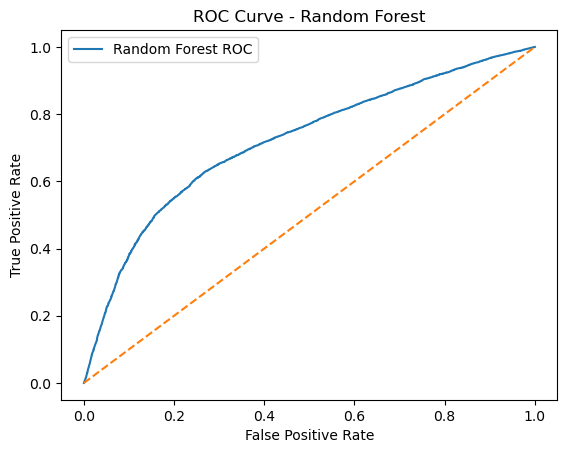


Training kNeighbors...


In [ ]:
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

best_model = None
best_accuracy = 0
best_model_name = ""

for name, model in models.items():

    print(f"\nTraining {name}...")

    # ----- KNN with GridSearch -----
    if name == 'kNeighbors':
        param_grid = {
            'model__n_neighbors': range(1, 31),
            'model__weights': ['uniform', 'distance']
        }

        grid = GridSearchCV(
            model,
            param_grid,
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )

        grid.fit(X_train, y_train)
        trained_model = grid.best_estimator_

    # ----- Other Models -----
    else:
        trained_model = model
        trained_model.fit(X_train, y_train)

    # ----- Evaluation -----
    y_pred = trained_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # ROC requires probabilities
    y_prob = trained_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    print(f"{name} Accuracy: {acc:.4f}")

    # ----- ROC Plot -----
    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} ROC")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()

    # ----- Best Model Selection -----
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = trained_model
        best_model_name = name

print("\n==============================")
print(f"Best Model : {best_model_name}")
print(f"Best Accuracy : {best_accuracy:.4f}")


## ROC Curved

In [20]:
#we will use logistic model
# save the model
import joblib
joblib.dump(log_reg_pipeline , './cardiovascular_model.joblib')
print("Model saved sucessfully")

Model saved sucessfully


In [ ]:
## k-fold , hyper parameter tuning